<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/AI_AutoEncoder_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더(AutoEncoder)
---
---
## 앞서 살펴본 신경망들은 입력(X)에 대한 출력(Y)를 학습한 뒤에 
## 학습 과정에서 못봤던 새로운 입력에 대해서도 알맞은 정답을 출력하는 것이 목표였습니다. 
## 이처럼 입력에 대한 출력의 쌍이 존재하고 그 관계를 학습하는 방법을 지도학습이라고 불렀습니다. 

## 오토인코더는 입력에 대한 출력을 학습해야 한다는 점은 
## 다른 지도학습 신경망과 동일하지만 
## 출력값이 입력과 동일하다는 점입니다.
---
---

## 이렇게 오토인코더는 자기 자신을 재생성하는 신경망 구조입니다. 

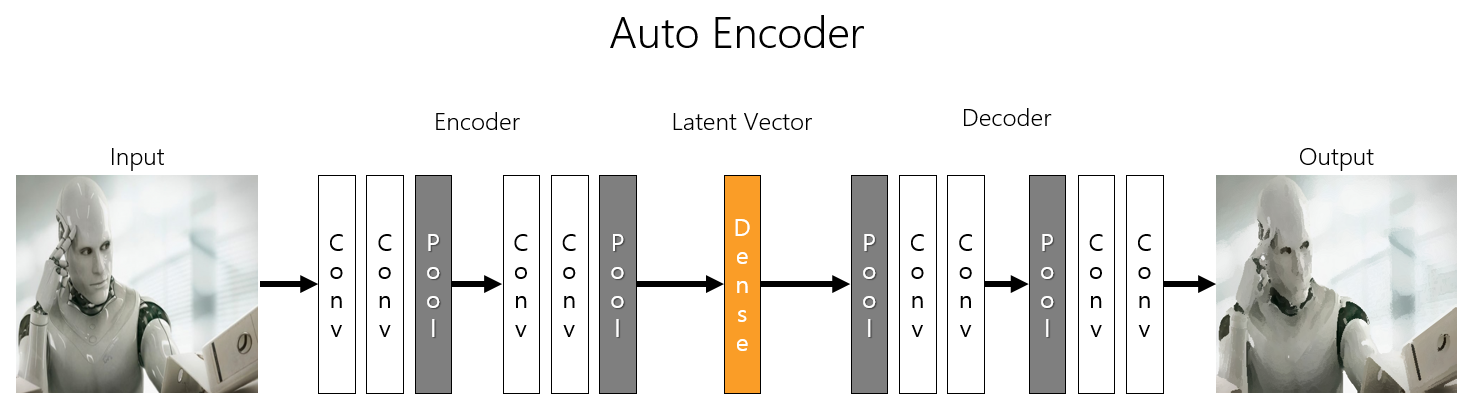

# 오토인코더의 세 부분 : 인코더와 디코더, 잠재 변수
## 오토인코더는 크게 세 부분으로 나눠볼 수 있습니다.
## 여기서 인코더(Encoder)란 잠재변수를 중심으로 입력에 가까운 부분을, 
## 디코더(Decoder)란 잠재변수를 중심으로 출력에 가까운 부분을 의미합니다. 
---
---
## 인코더는 입력에서 잠재 변수를 만드는 부분이고, 
## 디코더는 잠재변수를 출력으로 만드는 부분입니다. 
## 이 둘의 구조는 대칭되는 구조를 이루는게 일반적입니다. 

---
---

## 인코더는 지금까지 컨볼루션 신경망에서 봐왔던 특징을 추출하는 역할을 합니다. 
## 특징 추출기는 입력 이미지에서 특징을 추출해 
## 이후 완전 연결계층으로의 연결을 위해 1차원의 벡터로 만들었습니다.
## 이러한 일차원의 벡터가 바로 **잠재변수**인 것입니다.  
---
---


## 그럼 **잠재변수**에는 입력 데이터가 압축돼어 있을 것입니다. 
## 이 압축된 데이터를 다시 해석하여 출력 데이터, 
## 즉 동일한 **입력 데이터**를 다시 해석하여 주는 것이 **디코더의 역할**입니다. 

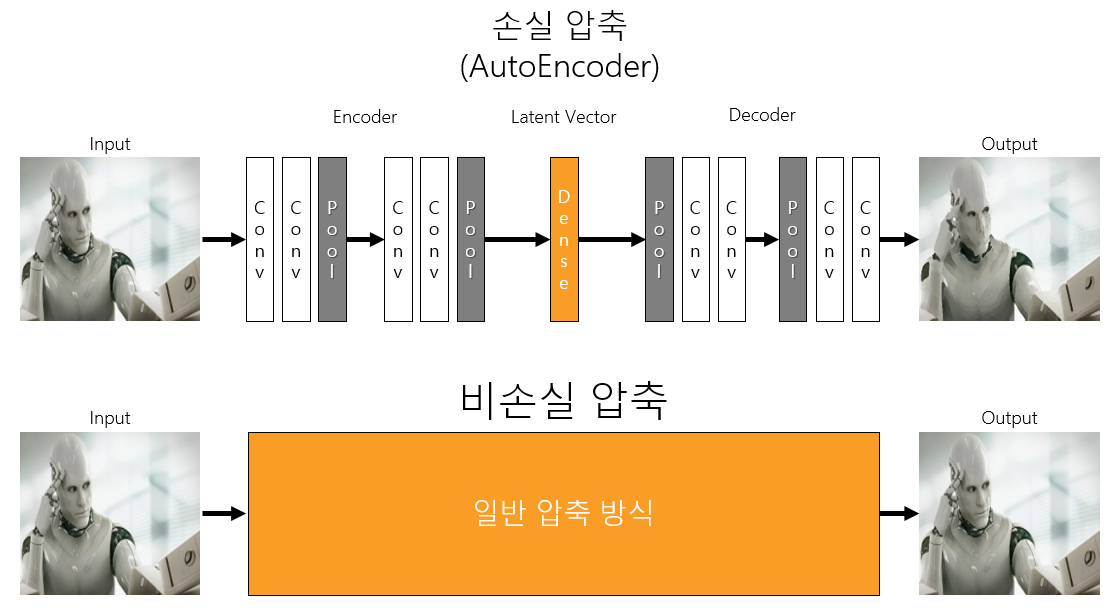

## **오토인코더**는 운영체제에서 자주 사용하는 **압축파일과도 비교**할 수 있습니다. 
## 보통 zip 같은 확장자를 사용하는 **압축 파일**은 
## **압축하기 전과 압축을 해제한 뒤의 내용이 동일**합니다. 
## 압축 프로그램에서 압축 전과 후의 파일 내용이 달라진다면 
## 우리는 그 압축 프로그램을 믿고 사용할 수 없을 것입니다. 
## 이를 **비손실 압축**이라고 합니다. 

## 이와 달리 **오토인코더**는 **손실 압축**으로, 
## **입력과 출력이 완전히 일치하지는 않습니다**. 
## 그 대신 **압축률**이 **비손실 압축보다 크게 올라가며**, 
## **압축률을 높이는 과정**에서 **잠재 변수에 원본 데이터의 특징**을 잘 나타내는 
## **효율 적인 방법**을 찾게 됩니다. 
## **더 적은 양의 데이터로 많은 양의 정보를 표현**해야 하기 때문입니다. 

## 이렇게 압축된 잠재 변수는 데이터의 특징을 가장 잘 표현하는 정보이기 때문에 
## 여러가지 용도로 쓰입니다.
## 예를들어 디코더 부분을 응용하여 출력되어지는 이미지를 더 정교하게 표현한다든지 등 입니다. 

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

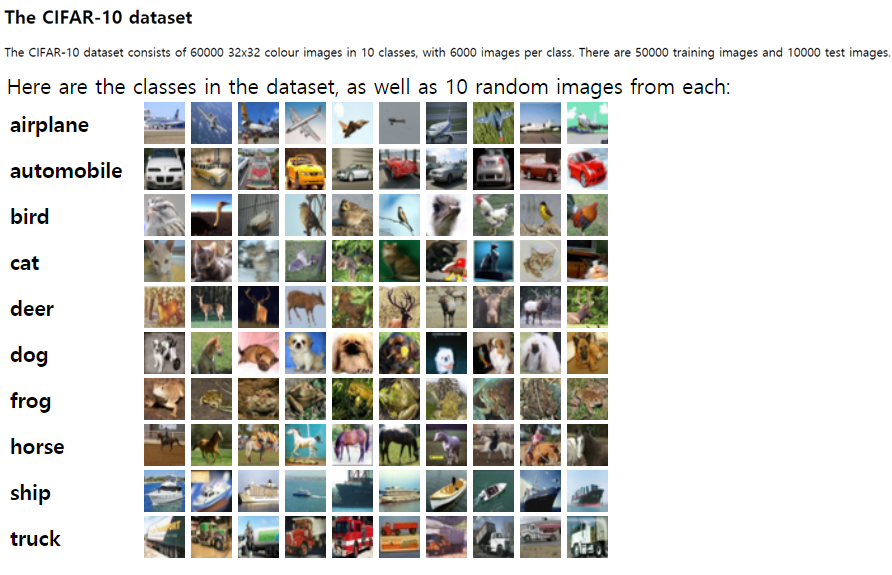

In [2]:
# 이번에 사용할 예제는 학습 데이터는 cifar10 이라는 데이터 입니다. 
# 이 데이터는 32,32,3 크기의 값을 갖는 컬러 이미지 데이터셋입니다. 
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print("train_X.shape : ", train_X.shape, "train_Y.shape : ", train_Y.shape)

train_X.shape :  (50000, 32, 32, 3) train_Y.shape :  (50000, 1)


In [4]:
# 정규화 과정도 함께 수행하여 주겠습니다. 
train_X_norm = train_X / 255.0
test_X_norm  = test_X  / 255.0

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


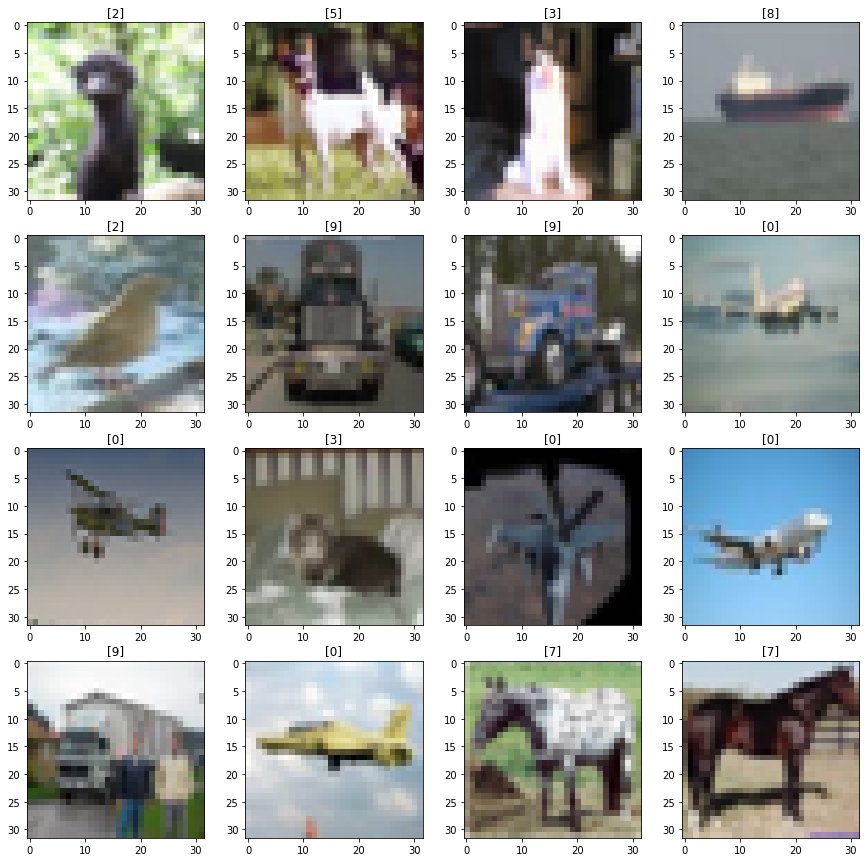

In [5]:
# 다음은 데이터 시각화를 위한 과정입니다. 
plt.figure(figsize = (15,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    i = np.random.choice(1000)
    # 위에서 변수화한 이미지를 한장 씩 가져오도록 합니다. 
    plt.imshow(train_X_norm[i].reshape(32,32,3))
    plt.title(train_Y[i])

plt.show()

## 가장 간단한 형태의 오토인코더를 만들어 보겠습니다. 
## 이전에 배웠던 내용을 기반으로 **Dense 레이어**를 사용한 모델을 학습시켜본 후에 
## 다음 실험으로는 **컨볼루션 레이어**를 사용해 보겠습니다. 

In [8]:
# 모델을 정의하기 전에 3차원의 입력 데이터를 완전 연결 계층으로 전달하기 위해 
# 1차원 데이터로 전환시켜 주겠습니다.
train_X_reshape = train_X_norm.reshape(-1, 32*32*3)
test_X_reshape  = test_X_norm.reshape(-1,  32*32*3)

print("train_X_norm:",train_X_norm.shape)

print("train_X_reshape : ", train_X_reshape.shape)
print("train_Y : ", train_Y.shape)

train_X_norm: (50000, 32, 32, 3)
train_X_reshape :  (50000, 3072)
train_Y :  (50000, 1)


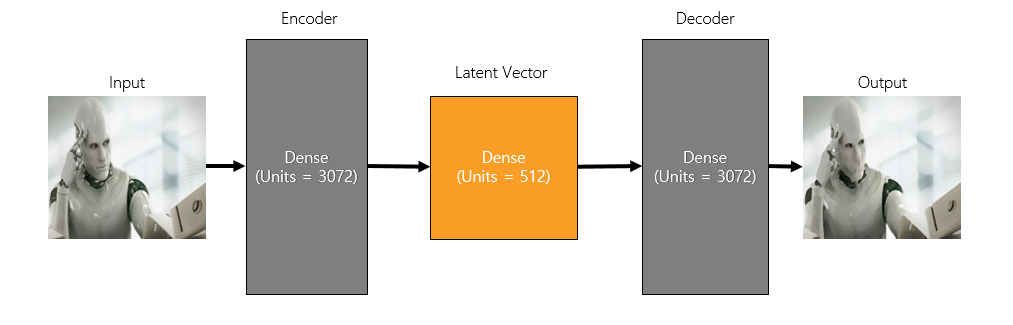

In [9]:
# 이제 오토인코더의 입력 계층, 잠재변수, 출력 계층을 생성하여 주겠습니다. 
model = tf.keras.Sequential([
                             # 첫 번째 레이어는 오토인코더의 입력 계층을 의미 합니다. 
                             tf.keras.layers.Dense(units = 3072, activation = 'relu', input_shape=(3072,)),

                             # 두 번째 레이어는 첫 번째와 세 번째 레이어보다 유닛의 수가 꽤 적습니다. 
                             # 오토인코더의 가운데에 있는 이 레이어가 잠재 변수를 만드는 레이어가 되겠습니다. 
                             # 손실압축을 수행하는 과정이며, 여기엔 이미지에서 뽑아낸 특징이 압축되어 있게 됩니다. 
                             tf.keras.layers.Dense(units = 512,   activation = 'relu'),

                             # 마지막 레이어는 오토인코더의 출력 레이어가 됩니다. 
                             # 출력 레이어는 오토인코더의 특징상 
                             # 입력 레이어와 동일한 유닛의 수를 배치하였습니다.  
                             tf.keras.layers.Dense(units = 3072, activation = 'sigmoid')
])

model.compile(optimizer = tf.optimizers.Adam(), loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 3072)              1575936   
Total params: 12,589,568
Trainable params: 12,589,568
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_X_reshape

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [11]:
# 학습을 수행하는 과정에서 
# 입력과 출력을 같은 독립변수를 사용하여 줍니다. 
# 오토인코더의 특징상 독립변수와 종속변수가 아닌 독립변수만을 사용하여야 합니다. 
history = model.fit(x = train_X_reshape, y = train_X_reshape, epochs = 100, batch_size = 256, verbose = 2)

Epoch 1/100
196/196 - 6s - loss: 0.0380
Epoch 2/100
196/196 - 2s - loss: 0.0244
Epoch 3/100
196/196 - 2s - loss: 0.0211
Epoch 4/100
196/196 - 2s - loss: 0.0185
Epoch 5/100
196/196 - 2s - loss: 0.0182
Epoch 6/100
196/196 - 2s - loss: 0.0159
Epoch 7/100
196/196 - 2s - loss: 0.0147
Epoch 8/100
196/196 - 2s - loss: 0.0150
Epoch 9/100
196/196 - 2s - loss: 0.0140
Epoch 10/100
196/196 - 2s - loss: 0.0131
Epoch 11/100
196/196 - 2s - loss: 0.0129
Epoch 12/100
196/196 - 2s - loss: 0.0128
Epoch 13/100
196/196 - 2s - loss: 0.0126
Epoch 14/100
196/196 - 2s - loss: 0.0126
Epoch 15/100
196/196 - 2s - loss: 0.0125
Epoch 16/100
196/196 - 2s - loss: 0.0124
Epoch 17/100
196/196 - 2s - loss: 0.0123
Epoch 18/100
196/196 - 2s - loss: 0.0126
Epoch 19/100
196/196 - 2s - loss: 0.0121
Epoch 20/100
196/196 - 2s - loss: 0.0122
Epoch 21/100
196/196 - 2s - loss: 0.0121
Epoch 22/100
196/196 - 2s - loss: 0.0122
Epoch 23/100
196/196 - 2s - loss: 0.0121
Epoch 24/100
196/196 - 2s - loss: 0.0120
Epoch 25/100
196/196 - 2s

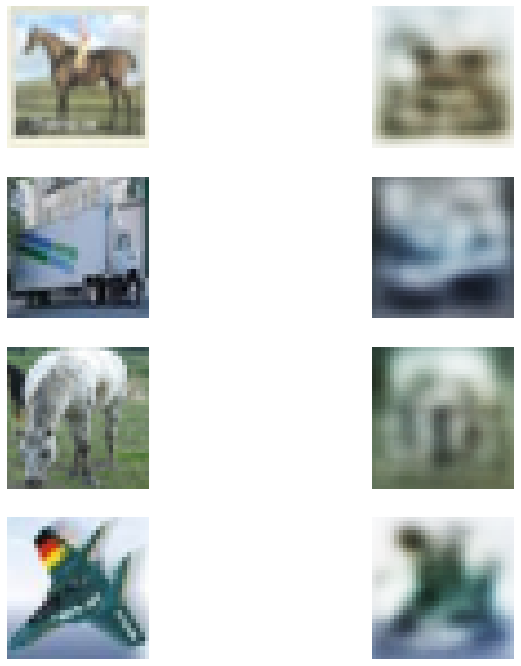

In [13]:
import random

plt.figure(figsize=(12,12))

# 비교를 위해 실제 이미지와, 학습 후 예측을 통한 결과값을 동시에 출력해보도록 하겠습니다. 
for i in range(4):

    # 비교를 위해 원본 행 열을 선정합니다. 
    plt.subplot(4,2,i*2+1)
    # 무작위 값을 하나 선정합니다. 
    rand_index = random.randint(0, test_X_reshape.shape[0])
    # 이미지를 보여주는 과정입니다. 
    plt.imshow(test_X_reshape[rand_index].reshape(32,32,3))
    plt.axis('off')
    
    # 오토인코더를 통과한 예측 결과를 행 열 선정합니다.  
    plt.subplot(4,2,i*2+2)
    # predict() 함수를 사용하여 같은 테스트 데이터를 예측 수행하여 줍니다. 
    # 이 과정에서 np.expand_dims()를 사용하여 차원을 하나 추가해서 신경망에 
    # 넣어줄 수 있도록 수행합니다.  
    img = model.predict(np.expand_dims(test_X_reshape[rand_index], axis=0))
    plt.imshow(img.reshape(32,32,3))
    plt.axis('off')

plt.show()

In [14]:
# 모델을 평가하는 과정입니다. 
# 이 값은 결국 같은 데이터를 바탕으로 MSE를 구축하는 과정이니 
# 오토인코더를 통해 출력되어지는 이미지가 다르다면 
# MSE 값은 높아질 수 밖에 없습니다.
model.evaluate(test_X_reshape, test_X_reshape)

313/313 [==============================] - 1s 4ms/step - loss: 0.0082


0.008239472284913063

## 이번에는 이미지 처리에 적합한 합성곱 신경망을 사용하여 
## 오토인코더를 구현해보도록 하겠습니다. 

In [19]:
model = tf.keras.Sequential([
                             # 인코더를 정의하는 과정입니다. 
                             # 첫 번째 레이어를 통해 32 × 32 크기의 이미지가 절반의 크기인 16 × 16 으로 줄어들게 됩니다. 
                             tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape = (32,32,3)),
                             # 두 번째 레이어를 통해 16 × 16 크기의 이미지가 절반의 크기인 8 × 8 으로 줄어들게 됩니다. 
                             tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),

                             # 다음은 잠재변수를 만들어 주기 위한 과정입니다. 
                             # 잠재변수는 특징을 압축하기 위해 
                             # 합성곱 신경망을 통과한 결과를 완전연결계층으로 압축하여 주겠습니다.   
                             # 그 과정에서 평탄화 과정을 먼저 수행하여 줍니다. 
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 64, activation = 'relu'),

                             # 다음은 디코더를 생성하는 과정입니다. 
                             # 디코더는 인코더와 대칭이 되도록 쌓아올려주겠습니다.

                             # 잠재변수와 가장 가까운 완전연결계층을 쌓아주는 과정입니다. 
                             # 1차원으로 펼쳐주었을때의 유닛값을 갖도록 하겠습니다. 
                             tf.keras.layers.Dense(units = 8*8*64, activation = 'relu'),

                             # 다음은 합성곱 신경망을 쌓기 위한 과정으로 
                             # 1차원의 데이터를 3차원으로 바꿔주는 과정을 먼저 수행하여 줍니다. 
                             # 이 레이어는 단순 수정이기 때문에 가중치가 존재하지 않습니다. 
                             tf.keras.layers.Reshape(target_shape=(8,8,64)),

                             # 그리고 대칭을 이루도록 합성곱 신경망을 쌓는 과정입니다. 
                             # 이는 합성곱 신경망이하는 일을 반대로 수행하는 디컨볼루션 레이어라고도 부릅니다.
                             # 입력이 되는 하나의 값을 컨볼루션 신경망을 통과시켜서 출력의 여러 값들을 계산해주는 함수이죠.  
                             tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),

                             # 마지막 레이어의 필터가 3개인 이유는 초기 이미지가 컬러임을 고려하였기 때문입니다.  
                             # 활성화 함수로 sigmoid를 주는 이유는 출력되어지는 값 자체가 0과 1 사이에 있기 때문에 
                             # 0 ~ 1 사이의 값을 반환하는 sigmoid를 줄 수 있습니다. 
                             tf.keras.layers.Conv2DTranspose(filters=3,  kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 16, 32)        416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              266240    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 32)       

In [21]:
print("train_X_norm.shape : ", train_X_norm.shape)

train_X_norm.shape :  (50000, 32, 32, 3)


In [22]:
history = model.fit(train_X_norm, train_X_norm, epochs = 100, batch_size=256,verbose=2)

Epoch 1/100
196/196 - 31s - loss: 0.0357
Epoch 2/100
196/196 - 2s - loss: 0.0166
Epoch 3/100
196/196 - 2s - loss: 0.0134
Epoch 4/100
196/196 - 2s - loss: 0.0120
Epoch 5/100
196/196 - 2s - loss: 0.0113
Epoch 6/100
196/196 - 2s - loss: 0.0108
Epoch 7/100
196/196 - 2s - loss: 0.0105
Epoch 8/100
196/196 - 2s - loss: 0.0103
Epoch 9/100
196/196 - 2s - loss: 0.0103
Epoch 10/100
196/196 - 2s - loss: 0.0102
Epoch 11/100
196/196 - 2s - loss: 0.0101
Epoch 12/100
196/196 - 2s - loss: 0.0101
Epoch 13/100
196/196 - 2s - loss: 0.0100
Epoch 14/100
196/196 - 2s - loss: 0.0100
Epoch 15/100
196/196 - 2s - loss: 0.0099
Epoch 16/100
196/196 - 2s - loss: 0.0099
Epoch 17/100
196/196 - 2s - loss: 0.0098
Epoch 18/100
196/196 - 2s - loss: 0.0097
Epoch 19/100
196/196 - 2s - loss: 0.0095
Epoch 20/100
196/196 - 2s - loss: 0.0095
Epoch 21/100
196/196 - 2s - loss: 0.0094
Epoch 22/100
196/196 - 2s - loss: 0.0094
Epoch 23/100
196/196 - 2s - loss: 0.0094
Epoch 24/100
196/196 - 2s - loss: 0.0093
Epoch 25/100
196/196 - 2

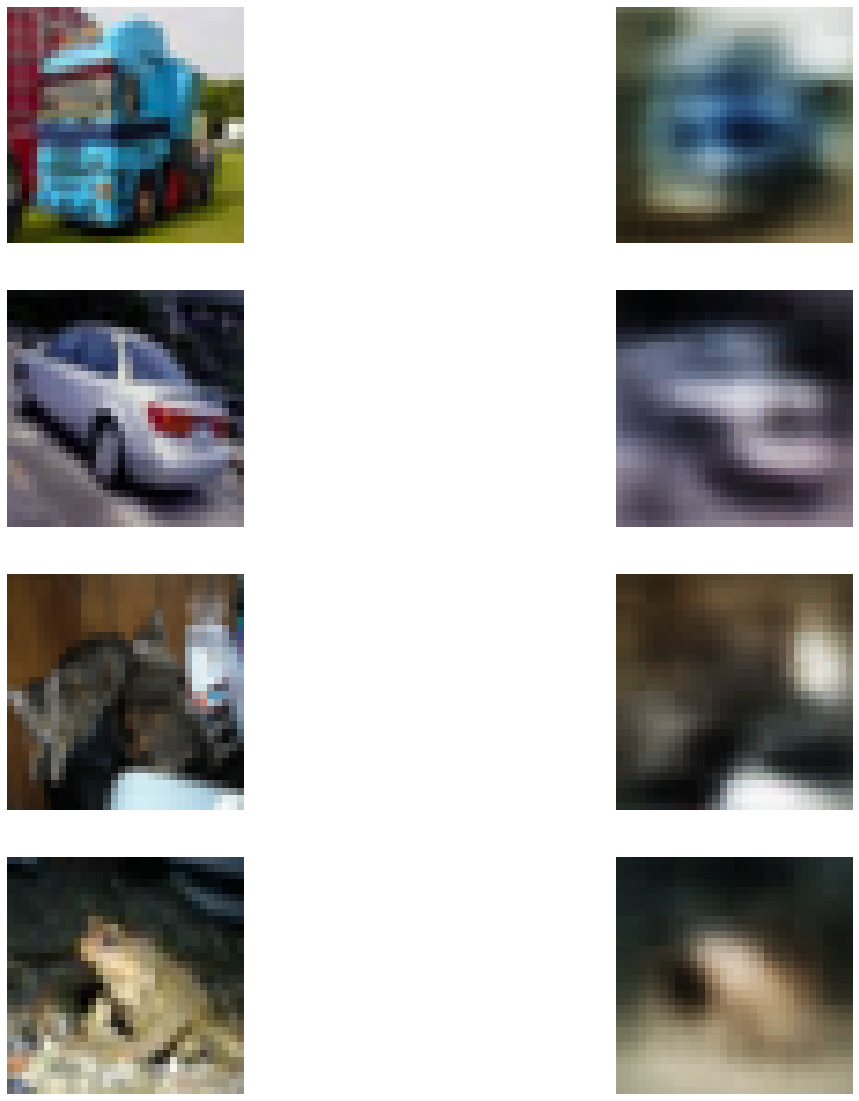

In [23]:
import random

plt.figure(figsize=(20,20))

# 비교를 위해 실제 이미지와, 학습 후 예측을 통한 결과값을 동시에 출력해보도록 하겠습니다. 
for i in range(4):

    # 비교를 위해 원본 행 열을 선정합니다. 
    plt.subplot(4,2,i*2+1)
    # 무작위 값을 하나 선정합니다. 
    rand_index = random.randint(0, test_X_norm.shape[0])
    # 이미지를 보여주는 과정입니다. 
    plt.imshow(test_X_norm[rand_index])
    plt.axis('off')
    
    # 오토인코더를 통과한 예측 결과를 행 열 선정합니다.  
    plt.subplot(4,2,i*2+2)
    # predict() 함수를 사용하여 같은 테스트 데이터를 예측 수행하여 줍니다. 
    # 이 과정에서 np.expand_dims()를 사용하여 차원을 하나 추가해서 신경망에 
    # 넣어줄 수 있도록 수행합니다.  
    img = model.predict(np.expand_dims(test_X_norm[rand_index], axis=0))
    # 예측을 통과한 값은 4차원 데이터이기에 reshpe을 통해 3차원으로 바꿔주고,
    # 시각화를 수행하여 줍니다.   
    img_reshape = img.reshape(32,32,3)
    plt.imshow(img_reshape)
    plt.axis('off')

plt.show()

In [24]:
model.evaluate(test_X_norm, test_X_norm)

313/313 [==============================] - 2s 5ms/step - loss: 0.0090


0.008968111127614975

# $$ Activation Function $$
# $$ 'elu(Exponentail Linear Unit)' $$

# $$elu(x) = \begin{cases}a(e^x-1), & x < 0 \\x, & x  \geq 0\end{cases} $$
### $$※ a(alpha) = 1.0 $$

## 우린 지금까지 마지막 레이어를 제외하고는 
## ReLU라는 활성화 함수를 사용하였습니다. 
## ReLU는 양수는 그대로 반환하고 0이나 음수가 들어오면 
## 0을 반환합니다. 
---
## 신경망 연산을 진행하는 과정에서 0 출력되어지는 뉴런이 많다면 
## 그 뉴런은 계속해서 0이라는 결과를 출력하게 됩니다. 
---
## 그렇다면 이게 왜 문제가 될까요? 
---

## 출력은 다음 레이어의 가중치에 곱해지기 때문에 출력이 0이면 
## 가중치의 효과를 모두 0으로 만들어버리게 됩니다. 
---
## 물론 편향이 더해지겠지만 만약 편향또한 0이나 음수라면 
## ReLU 활성화 함수를 통과한 다음 레이어의 출력도 0이 되어질 것입니다. 

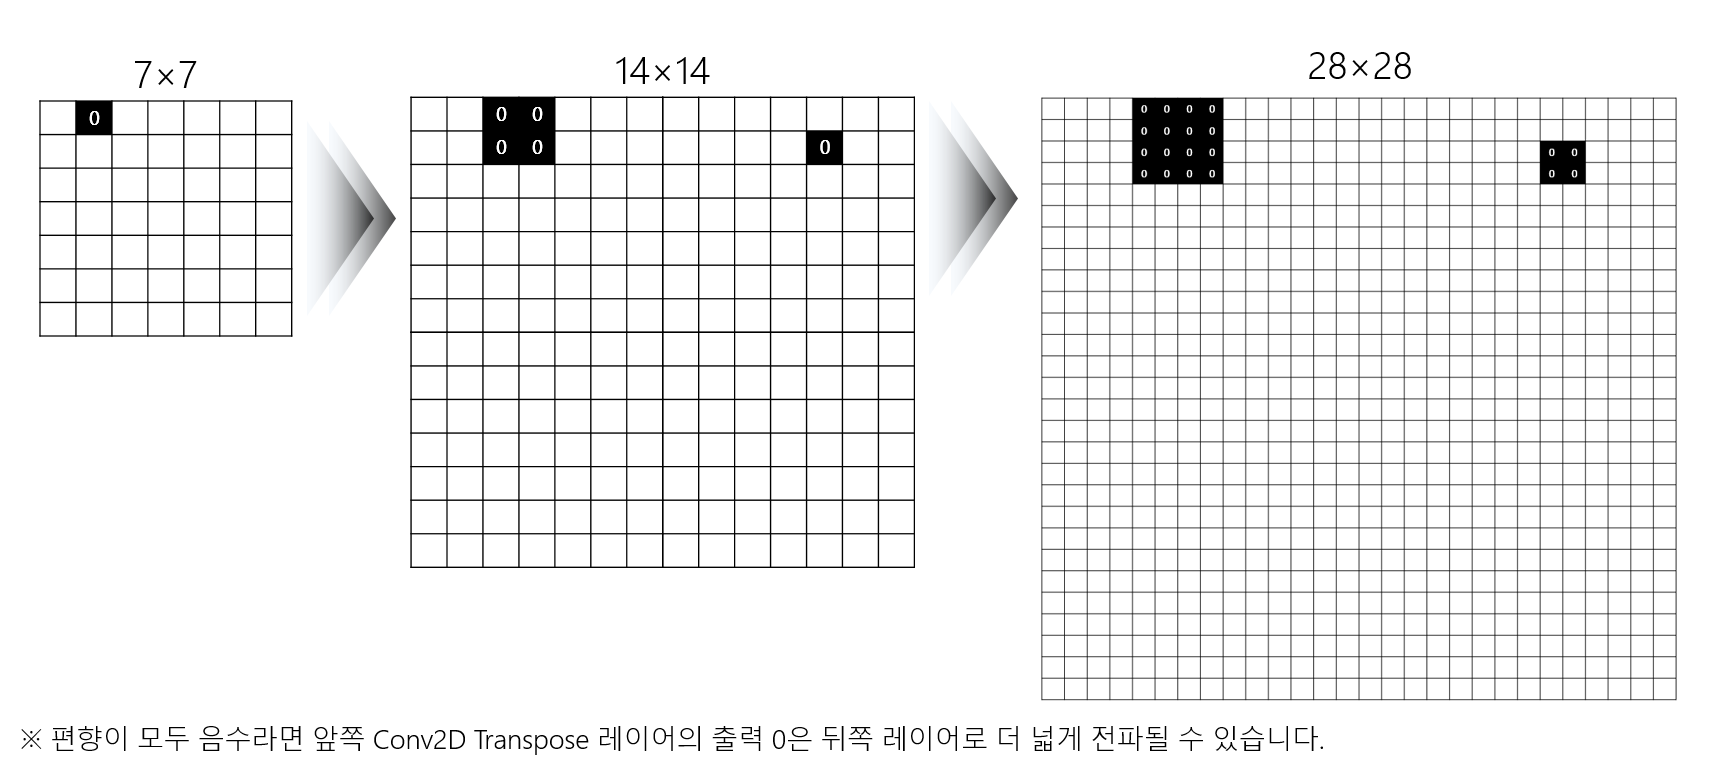

## 위 그림처럼 편향이 모두 음수라고 가정하면 
## 현재 출력값 0은 뒤쪽 레이어에 4배, 16배의 영향을 줍니다. 
## ReLU 가 음수를 0으로 출력하는 이런 특성 때문에 발생한 것입니다. 
---
---
## 이러한 ReLU의 문제점을 해결하기 위해 
## ReLU와 비슷하지만 음수를 받았을 때 0보다 조금 작은 음수를 출력하는 
## 여러 종류의 함수가 고안되었습니다. 
## 그중 elu는 다음과 같은 식으로 계산되어 집니다.

# $$elu(x) = \begin{cases}a(e^x-1), & x < 0 \\x, & x  \geq 0\end{cases} $$
### $$※ a(alpha) = 1.0 $$

## elu는 0 이하에서 부드럽게 감소하며 -1 에 수렴하게 됩니다. 
## 이렇게 약간의 값이 남아 있게 됨으로 
## 모든값이 0에 수렴하게 되었을 때 발생하는  
## 이미지가 각지는 현상을 극복할 수 있게 되어 집니다. 

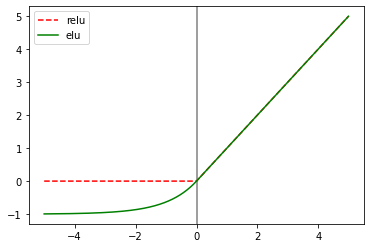

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.01)
alpha = 1.0
relu = [0 if z < 0 else z for z in x]
elu = [alpha * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray') # 0값 수직라인

plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [26]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters=128, kernel_size=2, strides=(2,2), activation='elu', input_shape = (32,32,3)),
                             tf.keras.layers.Conv2D(filters=256, kernel_size=2, strides=(2,2), activation='elu'),
                             tf.keras.layers.Flatten(),

                             tf.keras.layers.Dense(units = 256, activation = 'elu'),
                             tf.keras.layers.Dense(units = 8*8*256, activation = 'elu'),
                             tf.keras.layers.Reshape(target_shape=(8,8,256)),
                             
                             tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
                             tf.keras.layers.Conv2DTranspose(filters=3,  kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 128)       1664      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         131328    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_8 (Dense)              (None, 16384)             4210688   
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 16, 16, 128)      

In [28]:
print("train_X_norm.shape", train_X_norm.shape)

train_X_norm.shape (50000, 32, 32, 3)


In [29]:
history = model.fit(train_X_norm, train_X_norm, epochs = 250, batch_size=256, verbose=2)

Epoch 1/250
196/196 - 10s - loss: 0.0219
Epoch 2/250
196/196 - 10s - loss: 0.0077
Epoch 3/250
196/196 - 10s - loss: 0.0052
Epoch 4/250
196/196 - 10s - loss: 0.0044
Epoch 5/250
196/196 - 10s - loss: 0.0040
Epoch 6/250
196/196 - 10s - loss: 0.0038
Epoch 7/250
196/196 - 10s - loss: 0.0037
Epoch 8/250
196/196 - 10s - loss: 0.0036
Epoch 9/250
196/196 - 10s - loss: 0.0038
Epoch 10/250
196/196 - 10s - loss: 0.0034
Epoch 11/250
196/196 - 10s - loss: 0.0033
Epoch 12/250
196/196 - 10s - loss: 0.0032
Epoch 13/250
196/196 - 10s - loss: 0.0032
Epoch 14/250
196/196 - 10s - loss: 0.0031
Epoch 15/250
196/196 - 10s - loss: 0.0031
Epoch 16/250
196/196 - 10s - loss: 0.0031
Epoch 17/250
196/196 - 10s - loss: 0.0030
Epoch 18/250
196/196 - 10s - loss: 0.0030
Epoch 19/250
196/196 - 10s - loss: 0.0030
Epoch 20/250
196/196 - 10s - loss: 0.0030
Epoch 21/250
196/196 - 10s - loss: 0.0030
Epoch 22/250
196/196 - 10s - loss: 0.0029
Epoch 23/250
196/196 - 10s - loss: 0.0029
Epoch 24/250
196/196 - 10s - loss: 0.0029
E

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_X_norm, test_X_norm)

In [ ]:
import random

plt.figure(figsize=(15,15))

# 비교를 위해 실제 이미지와, 학습 후 예측을 통한 결과값을 동시에 출력해보도록 하겠습니다. 
for i in range(4):

    # 비교를 위해 원본 행 열을 선정합니다. 
    plt.subplot(4,2,i*2+1)
    # 무작위 값을 하나 선정합니다. 
    rand_index = random.randint(0, test_X_norm.shape[0])
    # 이미지를 보여주는 과정입니다. 
    plt.imshow(test_X_norm[rand_index])
    plt.axis('off')
    
    # 오토인코더를 통과한 예측 결과를 행 열 선정합니다.  
    plt.subplot(4,2,i*2+2)
    # predict() 함수를 사용하여 같은 테스트 데이터를 예측 수행하여 줍니다. 
    # 이 과정에서 np.expand_dims()를 사용하여 차원을 하나 추가해서 신경망에 
    # 넣어줄 수 있도록 수행합니다.  
    img_predict = model.predict(np.expand_dims(test_X_norm[rand_index], axis=0))
    # 예측을 통과한 값은 4차원 데이터이기에 reshpe을 통해 3차원으로 바꿔주고,
    # 시각화를 수행하여 줍니다.   
    img_predict_reshape = img_predict.reshape(32,32,3)
    plt.imshow(img_predict_reshape)
    plt.axis('off')

plt.show()

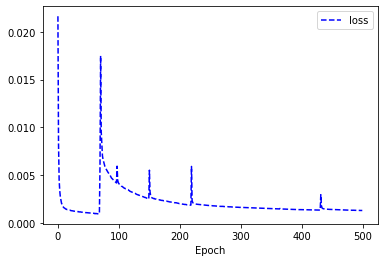

In [ ]:
plt.plot(history.history['loss'], 'b--', label='loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.save('AutoEncoder_high.h5')